In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

“A large-scale analysis of racial disparities in police stops across the United States” by Pierson et al.
[arxiv](https://arxiv.org/pdf/1706.05678&hl=en&sa=X&scisig=AAGBfm2zvR6alec2VLGC4MM7XEKygb6MoQ&nossl=1&oi=scholarr)
Fortunately, we live during the era of Open Science, so [data](https://openpolicing.stanford.edu/data/) is open, [analysis](https://openpolicing.stanford.edu/tutorials/) is open and presented in a form of tutorial, but that is in R
So lets rewrite everything in Python!

For educational purposes we will work with Philadelphia and Pennsylvania only available at [link](https://stacks.stanford.edu/file/druid:yg821jf8611/yg821jf8611_pa_philadelphia_2020_04_01.csv.zip)

In [5]:
df = pd.read_csv("pa_philadelphia_2020_04_01.csv")
df.head()

C:\Users\wirze\AppData\Local\Temp\ipykernel_19924\2835790522.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("pa_philadelphia_2020_04_01.csv")


,raw_row_number,date,time,location,lat,lng,district,service_area,subject_age,subject_race,...,arrest_made,outcome,contraband_found,frisk_performed,search_conducted,search_person,search_vehicle,raw_race,raw_individual_contraband,raw_vehicle_contraband
0,411981,2014-01-01,01:14:00,NaN,NaN,NaN,19.0,191,31.0,black,...,True,arrest,True,False,True,True,False,Black - Non-Latino,True,False
1,407442,2014-01-01,01:57:00,NaN,NaN,NaN,12.0,121,21.0,black,...,True,arrest,False,True,True,True,False,Black - Non-Latino,False,False
2,217556,2014-01-01,03:30:00,3400 BLOCK SPRUCE ST,39.950424,-75.192680,18.0,183,24.0,black,...,False,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False
3,217557,2014-01-01,03:40:00,3400 BLOCK SPRUCE ST,39.950424,-75.192680,18.0,183,20.0,black,...,False,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False
4,230988,2014-01-01,08:30:00,N 56TH ST / UPLAND WAY,39.983712,-75.234188,19.0,193,31.0,black,...,False,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False


In [6]:
df.describe()

,lat,lng,district,subject_age
count,1.760399e+06,1.760399e+06,1.865095e+06,1.860537e+06
mean,3.999082e+01,-7.515991e+01,1.897446e+01,3.482904e+01
std,4.300670e-02,5.408462e-02,1.055422e+01,1.333661e+01
min,3.987503e+01,-7.527569e+01,1.000000e+00,1.000000e+01
25%,3.995843e+01,-7.519555e+01,1.200000e+01,2.400000e+01
50%,3.999226e+01,-7.516022e+01,1.800000e+01,3.100000e+01
75%,4.002475e+01,-7.513019e+01,2.500000e+01,4.400000e+01
max,4.013789e+01,-7.495771e+01,7.700000e+01,1.100000e+02


use your print_uniques from recup2

write at least two sentences describing the data
Hint: [readme available at github](https://github.com/stanford-policylab/opp/blob/master/data_readme.md)
Our target variable are search_conducted and frisk_performed, they indicate *"whether any type of search was conducted, i.e. driver, passenger, vehicle. Frisks are excluded where the department has provided resolution on both"*
This data is about ...
For me the most interesting available variables are ...
Philadelphia is special because ...

## analysis
Authors defined **hit_rate**, as the the “proportion of searches that successfully turn up contraband.”

Calculate average contraband_found rate by race of a subject only among those who were searched

In [ ]:
# df[df['search_conducted'] == True]#####

among those who were searched,
for each district and by subject race\ethnicity
calculate average percentage of contraband found
reset indexes for christ sake

In [7]:
df_ht = df[df['search_conducted'] == True].\
    groupby(['district', 'subject_race']).\
    agg(hit_rate  = ('contraband_found', 'mean')).\
    reset_index()
df_ht

,district,subject_race,hit_rate
0,1.0,asian/pacific islander,0.154930
1,1.0,black,0.240082
2,1.0,hispanic,0.272727
3,1.0,other,0.333333
4,1.0,unknown,0.500000
...,...,...,...
125,77.0,black,0.041940
126,77.0,hispanic,0.056604
127,77.0,other,0.000000
128,77.0,unknown,0.000000


transform data into wide format
there are nice [gifs](https://github.com/gadenbuie/tidyexplain) for better understanding
check them out

pandas function is [pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)

we want to have districts in each row
and and hit rates for each race
also lets filter out all other races except for black, white, and hispanic people

rename column white as white_hit_rate

In [18]:
df_ht_wide = df_ht[df_ht['subject_race'].isin(["black", "white", "hispanic"])].\
    pivot_table(values = ['hit_rate'],
                index = ['district'],
                columns=['subject_race']).\
    rename({'white':'white_hit_rate'}, axis = 'columns').\
    reset_index(level='district', col_level=1, col_fill='district')
df_ht_wide

district  hit_rate                         
subject_race district     black  hispanic white_hit_rate
0                 1.0  0.240082  0.272727       0.277188
1                 2.0  0.351217  0.311304       0.320631
2                 3.0  0.293540  0.186495       0.238508
3                 5.0  0.204420  0.400000       0.201058
4                 6.0  0.233895  0.231707       0.174118
5                 7.0  0.219355  0.181818       0.201571
6                 8.0  0.203209  0.238095       0.214552
7                 9.0  0.214390  0.180556       0.182320
8                12.0  0.242017  0.301370       0.232365
9                14.0  0.228657  0.140000       0.225131
10               15.0  0.294636  0.254000       0.205858
11               16.0  0.305902  0.185185       0.321429
12               17.0  0.276910  0.256637       0.287425
13               18.0  0.238672  0.212121       0.238908
14               19.0  0.340197  0.243243       0.429952
15               22.0  0.242911  0.217877       0.233668
16               24.0  0.420622  0.447331       0.429279
17               25.0  0.296432  0.331142       0.389138
18               26.0  0.342292  0.321884       0.256630
19               35.0  0.242723  0.222445       0.279373
20               39.0  0.295119  0.226415       0.395349
21               77.0  0.041940  0.056604       0.020625

sometimes double headings of columns could screw us
thb, i am scared of them, so lets drop them
that a tiny hack that will help us later

In [19]:
df_ht_wide.columns = df_ht_wide.columns.droplevel(0)
df_ht_wide

subject_race,district,black,hispanic,white_hit_rate
0,1.0,0.240082,0.272727,0.277188
1,2.0,0.351217,0.311304,0.320631
2,3.0,0.293540,0.186495,0.238508
3,5.0,0.204420,0.400000,0.201058
4,6.0,0.233895,0.231707,0.174118
5,7.0,0.219355,0.181818,0.201571
6,8.0,0.203209,0.238095,0.214552
7,9.0,0.214390,0.180556,0.182320
8,12.0,0.242017,0.301370,0.232365
9,14.0,0.228657,0.140000,0.225131


And from wide format back to long one,
but not so long
we want to gather only minorities, and compare them against white

so long dataframe will have two rows for each district with black and hispanic as subject race
and new value name as minority_hit_rate

use function [melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) for this transformation

In [21]:
df_ht_long = df_ht_wide.\
    melt(id_vars = ['district', 'white_hit_rate'],
         value_vars = ['black', 'hispanic'],
         value_name= 'minority_hit_rate').\
    sort_values(by = ['district'])

df_ht_long.head()

,district,white_hit_rate,subject_race,minority_hit_rate
0,1.0,0.277188,black,0.240082
22,1.0,0.277188,hispanic,0.272727
1,2.0,0.320631,black,0.351217
23,2.0,0.320631,hispanic,0.311304
2,3.0,0.238508,black,0.293540


draw both minorities simultaneously with a sns scatter plot

<AxesSubplot:xlabel='white_hit_rate', ylabel='minority_hit_rate'>

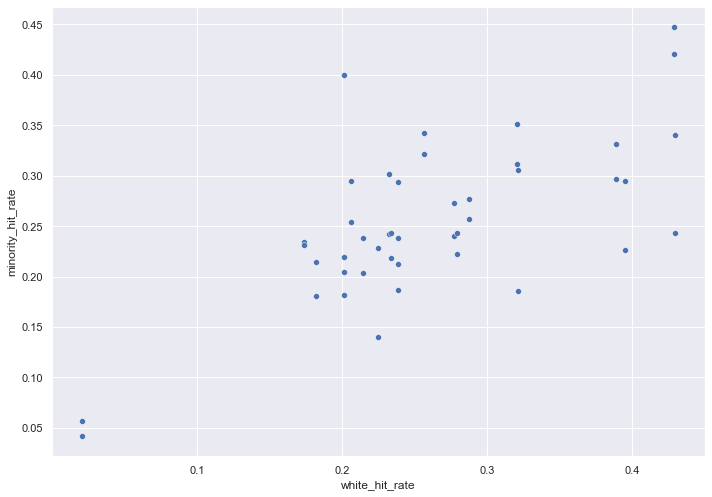

In [22]:
sns.scatterplot(data = df_ht_long,
                x = 'white_hit_rate',
                y = 'minority_hit_rate')

take a look at sns facet grid, or [relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), try to reproduce the graph from the article

In [ ]:
sns.relplot()

In [ ]:
from matplotlib import pyplot as plt

spend the next 10 minutes googling how to draw diagonal line

In [ ]:
sns.set_style("ticks")
g = sns.relplot(data=df_ht_long, x="white_hit_rate",
                y="minority_hit_rate",
                col="subject_race",
                color = 'black',
                # marker = '$\circ$'
                )

(g.set_axis_labels("white hit rate", "minority hit rate")
 .set_titles("race: {col_name} "))

xx = np.linspace(0, 0.45, 100)
yy = xx
for ax in g.axes.flat:
    ax.plot(xx,yy, color = 'black', linestyle = '--', alpha = 0.5)

Now try to make size each of the points change by number of searches

In [ ]:
df_ht_2 = df[df['search_conducted'] == True].\
    groupby(['subject_race', 'district']).\
    agg(n=('contraband_found', 'size')).\
    reset_index()
df_ht_2

In [ ]:
df_ht_wide_2 = df_ht_2[df_ht_2['subject_race'].isin(["black", "white", "hispanic"])].\
    pivot_table(values = ['n'], index = ['district'], columns=['subject_race'], fill_value=0).\
    rename({'white':'num_white_searches'}, axis = 'columns').\
    reset_index(level='district', col_level=1, col_fill='district')
df_ht_wide_2

In [ ]:
df_ht_wide_2.columns = df_ht_wide_2.columns.droplevel(0)
df_ht_wide_2

In [ ]:
df_ht_long_2 = df_ht_wide_2.melt(id_vars = ['district','num_white_searches'],
         value_vars = ['black', 'hispanic'],
         value_name = 'num_minority_searches')
    # sort_values(by=['district'])
df_ht_long_2['num_searches'] = df_ht_long_2.num_minority_searches + df_ht_long_2.num_white_searches
df_ht_long_2

In [ ]:
df_ht_long_2[['district', 'subject_race', 'num_searches']]

In [ ]:
df_final = df_ht_long.set_index(['district', 'subject_race']).join(df_ht_long_2[['district', 'subject_race', 'num_searches']].set_index(['district', 'subject_race']),
                on = ['district', 'subject_race']).reset_index()
df_final

In [ ]:
df_final

In [ ]:
sns.set_style("ticks")
g = sns.relplot(data=df_final, x="white_hit_rate",
                y="minority_hit_rate",
                col="subject_race",
                color = 'black',
                size = 'num_searches',
                marker = '$\circ$',
                sizes = (10, 200)
                )

(g.set_axis_labels("white hit rate", "minority hit rate")
 .set_titles("race: {col_name} "))

xx = np.linspace(0, 0.45, 100)
yy = xx
for ax in g.axes.flat:
    ax.plot(xx,yy, color = 'black', linestyle = '--', alpha = 0.5)